# 01 - Fundamentos de Python para meteorología

Este notebook cubre variables, listas, diccionarios, condicionales y funciones.

In [ ]:
# Celda de instalación (Colab)
try:
    import google.colab
    !pip install -r https://raw.githubusercontent.com/jpantojac/wrf-course/main/requirements_colab.txt

except Exception:
    pass

Este cuaderno busca que el alumnado domine tipos básicos, control de flujo, funciones y el “stack” científico mínimo para análisis meteorológico, que luego se utilizará con salidas de modelos numéricos como WRF.​
Se usarán NumPy para cómputo vectorizado, Pandas para datos tabulares y Xarray para arreglos N‑dimensionales con coordenadas y metadatos, que son centrales en geociencias.

In [4]:
# Colab: instalación rápida (si hace falta)
!pip -q install numpy pandas xarray netCDF4 matplotlib

import sys, numpy, pandas, xarray, matplotlib
print(sys.version)
print("NumPy:", numpy.__version__, "Pandas:", pandas.__version__, "Xarray:", xarray.__version__)


3.10.19 | packaged by conda-forge | (main, Oct 22 2025, 22:23:22) [MSC v.1944 64 bit (AMD64)]
NumPy: 1.26.4 Pandas: 2.3.3 Xarray: 2025.6.1


### Python esencial
Python proporciona un tutorial oficial que introduce sintaxis, tipos, control de flujo y funciones, por lo que aquí se resume lo mínimo con ejercicios prácticos.
Se recomienda ejecutar, modificar y volver a ejecutar cada celda para favorecer el aprendizaje activo y la comprensión de errores comunes

In [5]:
# Variables y tipos
a = 3            # int
b = 2.5          # float
c = "WRF"        # str
d = True         # bool

print(type(a), type(b), type(c), type(d))

# Operadores y f-strings
x = a + b
print(f"Suma a+b = {x:.2f}")


<class 'int'> <class 'float'> <class 'str'> <class 'bool'>
Suma a+b = 5.50


In [6]:
# Estructuras de datos
lista = [1, 2, 3, 5]
tupla = (10, 20)
dicc  = {"modelo": "WRF", "nivel": 850}

lista.append(8)
dicc["region"] = "Andes"
print(lista, tupla, dicc)


[1, 2, 3, 5, 8] (10, 20) {'modelo': 'WRF', 'nivel': 850, 'region': 'Andes'}


In [7]:
# Decisiones
t2 = 298.5
if t2 > 300:
    estado = "muy cálido"
elif t2 > 295:
    estado = "cálido"
else:
    estado = "templado"
print("Clasificación:", estado)


Clasificación: cálido


In [8]:
# Bucles
acum = 0
for k in range(1, 6):
    acum += k
print("Suma 1..5 =", acum)

# while
n = 0
while n < 3:
    print("Iteración", n)
    n += 1


Suma 1..5 = 15
Iteración 0
Iteración 1
Iteración 2


In [9]:
# Funciones y manejo de errores
def c_to_k(t_c):
    """Convierte °C a K."""
    return t_c + 273.15

try:
    print(c_to_k(25.0))
    print(c_to_k("25"))  # generará un error
except TypeError as e:
    print("Tipo inválido:", e)


298.15
Tipo inválido: can only concatenate str (not "float") to str


### NumPy en 15 minutos
NumPy introduce arreglos N‑dimensionales y operaciones vectorizadas que brindan rendimiento y claridad en cálculos numéricos típicos de meteorología.​
El “quickstart” oficial muestra creación de arreglos, formas, broadcasting, selección avanzada y funciones universales, que usaremos para estadísticas y máscaras lógicas

In [10]:
import numpy as np

# Crear arreglos
a = np.arange(12).reshape(3, 4)
b = np.linspace(0, 1, 4)
print("a shape:", a.shape, "b:", b)

# Operaciones vectorizadas y broadcasting
t = np.array([290., 295., 300., 305.])  # K
t_c = t - 273.15
print("°C:", t_c)

# Indexación y máscaras
print("a:\n", a)
mask = a > 6
print("Máscara:\n", mask)
print("Elementos > 6:", a[mask])

# Estadística rápida
print("Media a:", a.mean(), "Desv:", a.std())


a shape: (3, 4) b: [0.         0.33333333 0.66666667 1.        ]
°C: [16.85 21.85 26.85 31.85]
a:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Máscara:
 [[False False False False]
 [False False False  True]
 [ True  True  True  True]]
Elementos > 6: [ 7  8  9 10 11]
Media a: 5.5 Desv: 3.452052529534663


### 🔹 Producto elemento a elemento vs. Producto matricial en NumPy

```python
import numpy as np

A = np.array([[1, 1],
              [0, 1]])

B = np.array([[2, 0],
              [3, 4]])

print("Producto elemento a elemento:\n", A * B)
print("Producto matricial (A @ B):\n", A @ B)


In [11]:
# Producto y álgebra lineal
A = np.array([[1, 1], [0, 1]])
B = np.array([[2, 0], [3, 4]])
print("Producto elemento a elemento:\n", A * B)
print("Producto matricial (A @ B):\n", A @ B)


Producto elemento a elemento:
 [[2 0]
 [0 4]]
Producto matricial (A @ B):
 [[5 4]
 [3 4]]


### Pandas para tabulares
Pandas facilita el manejo de series y tablas, lectura/escritura y agregaciones, lo que es útil para estaciones o resúmenes horario‑diarios.​
La guía “Getting started” explica selección con loc/iloc, groupby, resample y gráficos básicos integrados, que se practicarán en el siguiente ejemplo sintético.

In [25]:
import pandas as pd
# Datos sintéticos tipo estación
df = pd.DataFrame({
    "time": pd.date_range("2024-03-01", periods=12, freq="h"),
    "T2": np.random.normal(298, 2, 12),     # K Crea 12 valores simulados de temperatura (en Kelvin), usando una distribución normal (gaussiana) con Media = 298, Desviación estándar = 2
    "WS": np.random.rayleigh(3, 12)         # m/s Crea 12 valores simulados de velocidad del viento (en m/s), según una distribución de Rayleigh con parámetro de escala 3
}).set_index("time")
#df
# Conversión de unidades y resumen diario
df["T2_C"] = df["T2"] - 273.15
daily = df.resample("D").agg({"T2_C":"mean","WS":"max"})
display(df.head(), daily)


,T2,WS,T2_C
time,,,
2024-03-01 00:00:00,297.883915,6.665388,24.733915
2024-03-01 01:00:00,299.286019,1.252554,26.136019
2024-03-01 02:00:00,297.651864,4.380534,24.501864
2024-03-01 03:00:00,299.875639,5.614773,26.725639
2024-03-01 04:00:00,296.594361,2.063915,23.444361


,T2_C,WS
time,,
2024-03-01,25.59111,6.665388


In [28]:
# Selección y filtros
seleccion = df.loc["2024-03-01 06:00":"2024-03-01 10:00"]
calido = df[df["T2_C"] > 25]
display(calido, seleccion)


,T2,WS,T2_C
time,,,
2024-03-01 01:00:00,299.286019,1.252554,26.136019
2024-03-01 03:00:00,299.875639,5.614773,26.725639
2024-03-01 06:00:00,299.881917,2.120444,26.731917
2024-03-01 08:00:00,300.214974,2.447893,27.064974
2024-03-01 09:00:00,299.392690,2.561936,26.242690
2024-03-01 10:00:00,300.899090,4.300244,27.749090
2024-03-01 11:00:00,300.357815,2.555519,27.207815


,T2,WS,T2_C
time,,,
2024-03-01 06:00:00,299.881917,2.120444,26.731917
2024-03-01 07:00:00,295.333393,4.124946,22.183393
2024-03-01 08:00:00,300.214974,2.447893,27.064974
2024-03-01 09:00:00,299.392690,2.561936,26.242690
2024-03-01 10:00:00,300.899090,4.300244,27.749090


### Xarray para datos N‑D
Xarray añade dimensiones, coordenadas y atributos sobre arreglos estilo NumPy, facilitando operaciones expresivas en datos gridded como NetCDF y GRIB.​
El tutorial de Pythia destaca DataArray y Dataset, subsetting por nombres de dimensiones, agregaciones y trazabilidad de metadatos CF, que son pilares del posproceso atmosférico.

In [29]:
import xarray as xr
# Dataset de ejemplo (descarga automática si no está en caché)
ds = xr.tutorial.open_dataset("air_temperature")
ds


C:\Users\pcjul\miniconda3\envs\curso-wrf\lib\site-packages\pyproj\network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

| Atributo                                                                                                                                                   | Qué significa                                                                                                                                                                                                                                                     |
| ---------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Conventions: COARDS**                                                                                                                                    | Indica que el dataset sigue las **convenciones COARDS**, un estándar para archivos NetCDF que define cómo organizar las coordenadas y las dimensiones. Esto asegura que programas de análisis puedan interpretar correctamente los datos.                         |
| **title: 4x daily NMC reanalysis (1948)**                                                                                                                  | El título del dataset. Dice que los datos son **re-análisis del NMC (National Meteorological Center)** con frecuencia **4 veces al día** desde 1948.                                                                                                              |
| **description: Data is from NMC initialized reanalysis (4x/day). These are the 0.9950 sigma level values.**                                                | Una descripción más detallada. Explica que: <br>• Los datos provienen de un **re-análisis inicializado por NMC** <br>• Se toman **4 veces al día** <br>• Los valores corresponden al **nivel sigma 0.9950**, que en meteorología es casi la superficie terrestre. |
| **platform: Model**                                                                                                                                        | Indica que los datos provienen de un **modelo** (no de mediciones directas).                                                                                                                                                                                      |
| **references: [http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html](http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html)** | Un enlace a la fuente oficial del dataset para obtener más información.                                                                                                                                                                                           |


In [32]:
# Selección por coordenadas y agregaciones
air = ds["air"]  # DataArray con dims (time, lat, lon)
aire_semana = air.sel(time=slice("2013-01-01","2013-01-07"))
prom_lat = aire_semana.mean("lat")
prom_dia = aire_semana.resample(time="1D").mean()
display(prom_lat, prom_dia)


<xarray.DataArray 'air' (time: 28, lon: 53)> Size: 12kB
array([[279.398 , 279.6664, 279.6612, ..., 279.9508, 280.3152, 280.6624],
       [279.0572, 279.538 , 279.7296, ..., 279.7756, 280.27  , 280.7976],
       [279.0104, 279.2808, 279.5508, ..., 279.682 , 280.1976, 280.814 ],
       ...,
       [279.0212, 279.0508, 278.9816, ..., 279.6288, 280.4496, 281.1496],
       [278.55  , 278.7272, 278.866 , ..., 278.8188, 279.6652, 280.5032],
       [278.5136, 278.7384, 278.9808, ..., 279.3376, 279.85  , 280.4384]])
Coordinates:
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 224B 2013-01-01 ... 2013-01-07T18:00:00

<xarray.DataArray 'air' (time: 7, lat: 25, lon: 53)> Size: 74kB
array([[[241.8725, 242.3   , 242.675 , ..., 233.3725, 235.175 ,
         237.675 ],
        [244.575 , 244.5725, 244.275 , ..., 231.2475, 232.825 ,
         236.3   ],
        [254.    , 253.2225, 251.8225, ..., 231.475 , 233.695 ,
         238.625 ],
        ...,
        [296.3   , 295.975 , 296.    , ..., 295.8975, 295.32  ,
         294.945 ],
        [296.325 , 296.725 , 296.7425, ..., 296.1725, 296.    ,
         295.5475],
        [296.62  , 296.995 , 297.1   , ..., 297.0225, 297.0475,
         296.9725]],

       [[243.6   , 243.5   , 243.3   , ..., 238.9725, 240.7975,
         243.0725],
        [247.8225, 247.2   , 246.2225, ..., 235.925 , 236.5975,
         238.6   ],
        [253.5225, 252.0725, 250.2975, ..., 237.6975, 238.8725,
         241.9   ],
...
        [296.2475, 295.    , 294.295 , ..., 294.175 , 293.7   ,
         293.47  ],
        [296.    , 295.55  , 295.02  , ..., 294.4725, 294.4475,
         294.3   ],
        [296.4475, 296.25  , 295.7475, ..., 295.9   , 295.85  ,
         295.9475]],

       [[252.1725, 252.575 , 252.7   , ..., 242.55  , 244.35  ,
         246.3975],
        [251.4   , 251.475 , 251.2725, ..., 238.0475, 239.9225,
         243.1975],
        [250.35  , 248.77  , 247.1175, ..., 240.6475, 243.1675,
         247.225 ],
        ...,
        [296.72  , 295.85  , 294.97  , ..., 295.2725, 294.9   ,
         294.0975],
        [296.795 , 296.45  , 295.6   , ..., 295.195 , 294.9   ,
         294.195 ],
        [297.05  , 296.7   , 296.145 , ..., 295.8725, 295.3225,
         294.925 ]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 56B 2013-01-01 2013-01-02 ... 2013-01-07
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

(array([  27.,  124.,  349.,  567., 1766., 2177.,  204.,   74.,    9.,
           3.]),
 array([-17.34254167, -14.08037083, -10.8182    ,  -7.55602917,
         -4.29385833,  -1.0316875 ,   2.23048333,   5.49265417,
          8.754825  ,  12.01699583,  15.27916667]),
 <BarContainer object of 10 artists>)

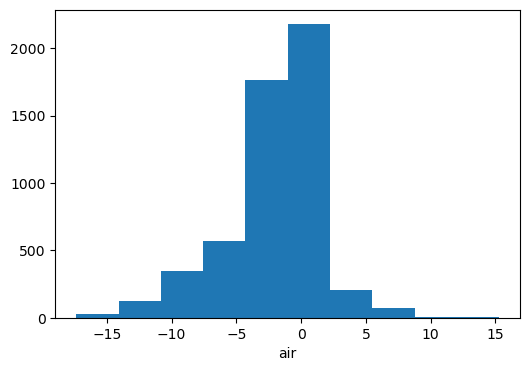

In [35]:
# Operaciones con metadatos y gráfico rápido
anom = air.groupby("time.month") - air.groupby("time.month").mean("time")
anom.sel(time="2013-06-01").plot(figsize=(6,4))



### Lectura y escritura con Xarray
open_dataset permite abrir NetCDF u orígenes OPeNDAP y decodificar metadatos CF; chunks habilita carga perezosa con dask para grandes volúmenes.​
xarray.tutorial.open_dataset ofrece datasets de ejemplo para practicar sin configurar fuentes externas, lo que agiliza ejercicios en Colab.

In [36]:
# Guardar un derivado con compresión
subset = air.sel(time=slice("2013-01-01","2013-01-03"))
subset.to_netcdf("air_3dias.nc", encoding={"air":{"zlib":True, "complevel":4}})
ds2 = xr.open_dataset("air_3dias.nc")
ds2


<xarray.Dataset> Size: 128kB
Dimensions:  (lat: 25, lon: 53, time: 12)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 96B 2013-01-01 ... 2013-01-03T18:00:00
Data variables:
    air      (time, lat, lon) float64 127kB ...

### Mini‑proyecto guiado
Objetivo: calcular temperatura media diaria y anomalías semanales, y visualizar un mapa y una serie, consolidando selección, resample y gráficos.​
Se trabaja sobre el dataset de ejemplo para garantizar reproducibilidad en cualquier entorno antes de pasar a salidas de WRF en capítulos siguientes

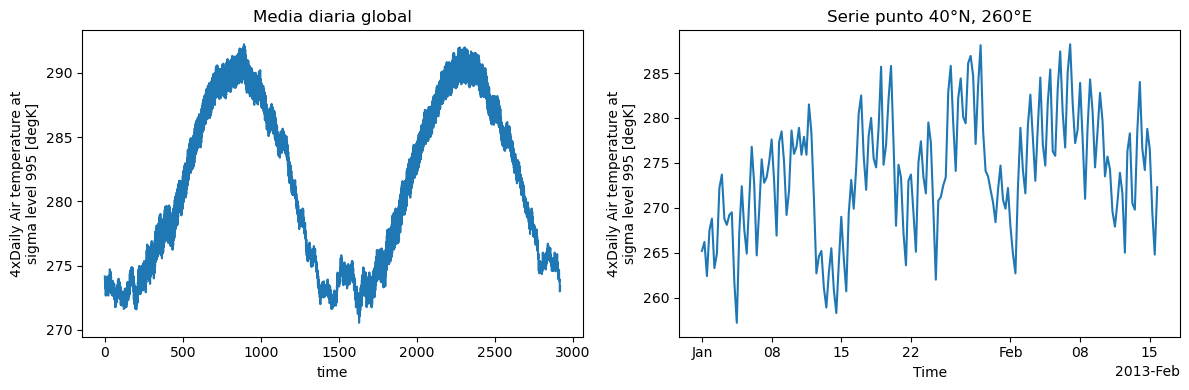

In [37]:
import matplotlib.pyplot as plt
air = xr.tutorial.open_dataset("air_temperature")["air"]
# Media diaria global y una serie en un punto
daily_mean = air.resample(time="1D").mean(("lat","lon"))
pt = air.sel(lat=40, lon=260, method="nearest")
fig, axes = plt.subplots(1,2, figsize=(12,4))
daily_mean.plot(ax=axes[0]); axes[0].set_title("Media diaria global")
pt.sel(time=slice("2013-01-01","2013-02-15")).plot(ax=axes[1]); axes[1].set_title("Serie punto 40°N, 260°E")
plt.tight_layout()


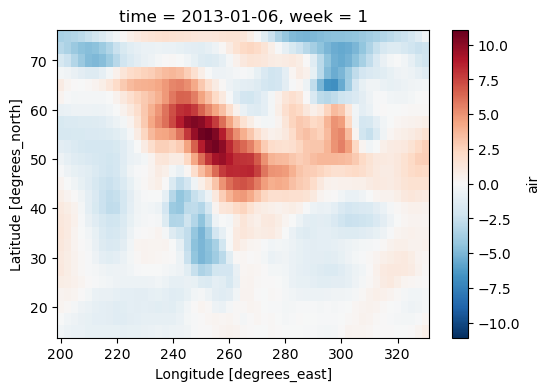

In [39]:
# Anomalía semanal y mapa
weekly = air.resample(time="1W").mean()
clim_w = weekly.groupby(weekly.time.dt.isocalendar().week).mean("time")
anom_w = weekly.groupby(weekly.time.dt.isocalendar().week) - clim_w
anom_w.isel(time=0).plot(figsize=(6,4))


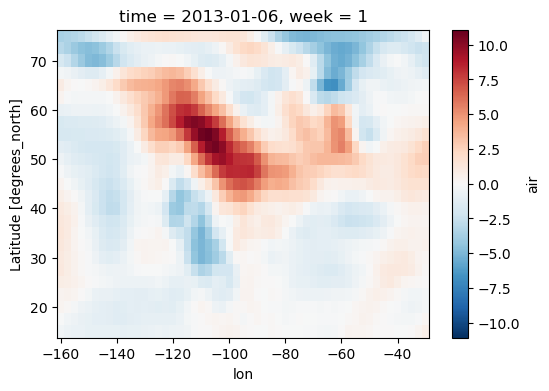

In [40]:
# Anomalía semanal y mapa
weekly = air.resample(time="1W").mean()
clim_w = weekly.groupby(weekly.time.dt.isocalendar().week).mean("time")
anom_w = weekly.groupby(weekly.time.dt.isocalendar().week) - clim_w

# Ajustar longitudes de 0-360 a -180 a 180
anom_w.coords['lon'] = (anom_w.coords['lon'] + 180) % 360 - 180

# Ordenar por longitud para que el mapa esté correcto
anom_w = anom_w.sortby('lon')

# Graficar la anomalía de la primera semana con longitudes ajustadas
anom_w.isel(time=0).plot(figsize=(6,4))